<a href="https://colab.research.google.com/github/innosevda/Data-Science-CRN-20018/blob/main/homework8v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1 (40 pt)

A sample of 30 respondents was interviewed using mall intercept interviewing. The respondents were asked to indicate their degree of agreement with the following statements using a seven-point scale (1 = strongly disagree, 7 = strongly agree).

•	V1 = It is important to buy a toothpaste that prevents cavities

•	V2 = I like a toothpaste that gives a shiny teeth

•	V3 = A toothpaste should strengthen your gums teeth

•	V4 = I prefer a toothpaste that freshens breath

•	V5 = Prevention of tooth decay is not an important benefit offered by a toothpaste

•	V6 = The most important consideration in buying a toothpaste is attractive teeth

By using the variables,

(1) How many factors is extracted from data for principal component analysis?

(2) What is the total percentage of variance explained by these principal components?

(3)Which variables are included in the same factors ? How can you name these factors?

You can find the data at

https://raw.githubusercontent.com/ogut77/DataScience/main/data/Toothpaste.csv

In [3]:
# Q1

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/ogut77/DataScience/main/data/Toothpaste.csv")

df.head()


,V1,V2,V3,V4,V5,V6
0,7.0,3.0,6.0,4.0,2.0,4.0
1,1.0,3.0,2.0,4.0,5.0,4.0
2,6.0,2.0,7.0,4.0,1.0,3.0
3,4.0,5.0,4.0,6.0,6.0,5.0
4,1.0,2.0,2.0,3.0,2.0,2.0


In [4]:
# PCA needs the data to be standardized (mean=0, std=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [5]:
# Applying PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Cumulative variance:", pca.explained_variance_ratio_.cumsum())


Explained variance ratio: [0.39747021 0.30295205 0.16145572 0.07131525 0.05138315 0.01542362]
Cumulative variance: [0.39747021 0.70042226 0.86187798 0.93319323 0.98457638 1.        ]


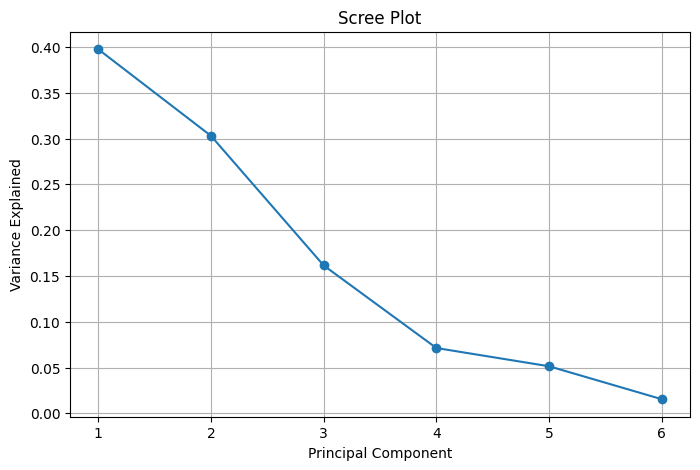

In [6]:
# Ploting the Scree Plot
# helps to visualize how many components to keep

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.grid(True)
plt.show()

In [7]:
# Loading tells us which variables belong to which component

loadings = pd.DataFrame(pca.components_.T,
                        columns=[f'PC{i+1}' for i in range(len(df.columns))],
                        index=df.columns)

print(loadings)

         PC1       PC2       PC3       PC4       PC5       PC6
V1 -0.300180  0.614344  0.183474  0.105313 -0.277200 -0.640999
V2  0.503715  0.263534  0.084629 -0.695009 -0.418370  0.107646
V3 -0.363633  0.570766  0.194627 -0.038606  0.200211  0.680105
V4  0.526215  0.210514  0.044580  0.709880 -0.344015  0.233493
V5  0.158218 -0.195328  0.940028  0.012959  0.214732 -0.082966
V6  0.471167  0.380642 -0.188827 -0.016849  0.737283 -0.231489


###Question 1:
PC1 and PC2 explain the most variance (especially PC1 ~40%, PC2 ~30%). After PC3, the variance drops sharply.
2 or 3 components can be extracted (most likely 3, since PC3 still explains ~16%).

###Question 2:
Explained Variance Ratio (Individual Components):

PC1: 39.7%

PC2: 30.3%

PC3: 16.1%

PC4: 7.1%

PC5: 5.1%

PC6: 1.5%

The total percentage of variance explained by these 3 components (PC1, PC2, PC3) is approximately: 86.2%


###Question 3:

Using loadings table,
most positive loadings for PC1 are V2, V4, V6. These are about attractive teeth, fresh breath, and aesthetic concerns. So we name PC1: Aesthetic/Appearance-Oriented

Most positive loadings for PC2 are V1, V3, V6, which are are about gum health, cavity prevention, and overall oral health. So we name PC2: Health-Oriented

For PC3, highest loading is V5, which is reverse-worded: "Prevention of tooth decay is not an important benefit offered by a toothpaste". We can name PC3: Tooth Decay Importance Attitude.


In [8]:
#Q2 and Q3 is below
# Data description is provided below

import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/Leads.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [ ]:
 #There are missing values in the Lead data .
# Replace missing variables with the mean  if variable is numeric or mode if variable is categorical.
for col in df.columns:
    if ((df[col].dtype == 'float64') or (df[col].dtype == 'float64')) :
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])


In [ ]:
#Check that there are no missing data
df.isnull().sum()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split



df = df.drop(columns=['Prospect ID','Lead Number'])
y = df['Converted']
X = df.drop(columns=['Converted'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
def eval(yact,ypred):
 from sklearn import metrics
 print("Accuracy:",metrics.accuracy_score(yact, ypred))
 print("Precision:",metrics.precision_score(yact, ypred))
 print("Recall:",metrics.recall_score(yact, ypred))

 cnf_matrix = metrics.confusion_matrix(yact, ypred)
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns
 %matplotlib inline
 class_names=[0,1] # name  of classes
 fig, ax = plt.subplots()
 tick_marks = np.arange(len(class_names))
 plt.xticks(tick_marks, class_names)
 plt.yticks(tick_marks, class_names)
 # create heatmap
 sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
 ax.xaxis.set_label_position("top")
 plt.tight_layout()
 plt.title('Confusion matrix', y=1.1)
 plt.ylabel('Actual label')
 plt.xlabel('Predicted label')


In [ ]:
#Q2(30 pt)-Using pycaret AutoML tools,make prediction on test data and evaluate performance of prediction using eval function defined above.

In [ ]:
#Q3(30 pt)-Using Autogluon  AutoML tools,make prediction on test data and evaluate performance of prediction using eval function defined above.